# Fuel Economy Analysis


## 1. Defining the Question.

## (a) Specifying the Analytical Question.

Q1: Are more unique models using alternative fuels in 2018 compared to 2008? By how much?

Q2: How much have vehicle classes improved in fuel economy (increased in mpg)?

Q3: What are the characteristics of SmartWay vehicles? Have they changed over time? (mpg, greenhouse gas)

Q4: What features are associated with better fuel economy (mpg)?

Q5: For all of the models that were produced in 2008 that are still being produced in 2018, how much has the mpg improved and which vehicle improved the most?


## (b) Understanding the context

The test data used to determine fuel economy estimates is derived from vehicle testing done at EPA's National Vehicle and Fuel Emissions Laboratory in Ann Arbor, Michigan, and by vehicle manufacturers who submit their own test data to EPA.

Each year, EPA provides fuel economy data to the Department of Energy (DOE), the Department of Transportation (DOT) and the Internal Revenue Service (IRS) so that they can administer their fuel economy-related programs.

# 2. Importing libraries.

In [167]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 3. Reading the Data

In [71]:
# Lets define a function that reads data
def read(data):
    return pd.read_csv(data)

In [72]:
fuel_08 = read('all_alpha_08.csv')
fuel_08.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


In [73]:
fuel_18 = read('all_alpha_18.csv')
fuel_18.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4WH3,small car,3,23,33,27,6,No,330


# 4. Data Understanding

## Assessing Data

In [74]:
# The shape of our datasets
print('The number of samples in the 2008 dataset',fuel_08.shape)
print('The number of samples in the 2018 dataset',fuel_18.shape)


The number of samples in the 2008 dataset (2404, 18)
The number of samples in the 2018 dataset (1611, 18)


In [75]:
# Duplicate rows in each dataset
print('The number of duplicated values in the 2008 data is ',fuel_08.duplicated().sum().sum())
print('The number of duplicated values in the 2018 data is ',fuel_18.duplicated().sum().sum())

The number of duplicated values in the 2008 data is  25
The number of duplicated values in the 2018 data is  0


In [76]:
# Let's check the Datatypes of the columns
print('Datatypes in the 2008 data ')
print(fuel_08.dtypes)
print('*'*50)
print('Data types in the 2018 data ')
print(fuel_18.dtypes)

Datatypes in the 2008 data 
Model                    object
Displ                   float64
Cyl                      object
Trans                    object
Drive                    object
Fuel                     object
Sales Area               object
Stnd                     object
Underhood ID             object
Veh Class                object
Air Pollution Score      object
FE Calc Appr             object
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Unadj Cmb MPG           float64
Greenhouse Gas Score     object
SmartWay                 object
dtype: object
**************************************************
Data types in the 2018 data 
Model                    object
Displ                   float64
Cyl                     float64
Trans                    object
Drive                    object
Fuel                     object
Cert Region              object
Stnd                     object
Stnd Description         object
Underhood ID  

In [77]:
# Lets check for features with missing values
print('The number of missing values in the 2008 dataset',fuel_08.isna().sum())
print('*'*50)
print('The number of missing values in the 2018 dataset',fuel_18.isna().sum())


The number of missing values in the 2008 dataset Model                     0
Displ                     0
Cyl                     199
Trans                   199
Drive                    93
Fuel                      0
Sales Area                0
Stnd                      0
Underhood ID              0
Veh Class                 0
Air Pollution Score       0
FE Calc Appr            199
City MPG                199
Hwy MPG                 199
Cmb MPG                 199
Unadj Cmb MPG           199
Greenhouse Gas Score    199
SmartWay                  0
dtype: int64
**************************************************
The number of missing values in the 2018 dataset Model                   0
Displ                   2
Cyl                     2
Trans                   0
Drive                   0
Fuel                    0
Cert Region             0
Stnd                    0
Stnd Description        0
Underhood ID            0
Veh Class               0
Air Pollution Score     0
City MPG              

In [78]:
# Number of non-null unique values for features in each dataset
print('The number of non-null in the 2008 dataset',fuel_08.info())
print('*'*50)
print('The number of non null in the 2018 dataset',fuel_18.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 2404 non-null   object 
 1   Displ                 2404 non-null   float64
 2   Cyl                   2205 non-null   object 
 3   Trans                 2205 non-null   object 
 4   Drive                 2311 non-null   object 
 5   Fuel                  2404 non-null   object 
 6   Sales Area            2404 non-null   object 
 7   Stnd                  2404 non-null   object 
 8   Underhood ID          2404 non-null   object 
 9   Veh Class             2404 non-null   object 
 10  Air Pollution Score   2404 non-null   object 
 11  FE Calc Appr          2205 non-null   object 
 12  City MPG              2205 non-null   object 
 13  Hwy MPG               2205 non-null   object 
 14  Cmb MPG               2205 non-null   object 
 15  Unadj Cmb MPG        

In [79]:
# Unique values and counts for each column
print('The number of unique values and counts in the 2008 dataset',fuel_08.nunique())
print('*'*50)
print('The number of unique values and counts in the 2018 dataset',fuel_18.nunique())


The number of unique values and counts in the 2008 dataset Model                   436
Displ                    47
Cyl                       8
Trans                    14
Drive                     2
Fuel                      5
Sales Area                3
Stnd                     12
Underhood ID            343
Veh Class                 9
Air Pollution Score      13
FE Calc Appr              2
City MPG                 39
Hwy MPG                  43
Cmb MPG                  38
Unadj Cmb MPG           721
Greenhouse Gas Score     20
SmartWay                  2
dtype: int64
**************************************************
The number of unique values and counts in the 2018 dataset Model                   367
Displ                    36
Cyl                       7
Trans                    26
Drive                     2
Fuel                      5
Cert Region               2
Stnd                     19
Stnd Description         19
Underhood ID            230
Veh Class                 9
Air Po

# 5. Data Cleaning

In [80]:
# Lets drop irrelevant columns from 2008 dataset
fuel_08.drop(['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'], axis=1, inplace=True)

# confirm changes
fuel_08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [81]:
# Lets drop irrelevant columns from 2018 dataset
fuel_18.drop(['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'],axis=1,inplace=True)

# confirm changes
fuel_18.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No


### Rename Columns

In [82]:
# rename Sales Area to Cert Region
fuel_08.rename(columns={'sales_area':'cert_region'},inplace=True)


# confirm changes
fuel_08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [83]:
# Lets replace spaces with underscores and lowercase labels for 2008 dataset
fuel_08.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

# confirm changes
fuel_08.head(1)

,model,displ,cyl,trans,drive,fuel,sales_area,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [84]:
# Lets replace spaces with underscores and lowercase labels for 2018 dataset
fuel_18.rename(columns=lambda x : x.strip().lower().replace(' ','_'),inplace=True)

# confirm changes
fuel_18.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No


In [85]:
# Lets confirm column labels for 2008 and 2018 datasets are identical
fuel_08.columns == fuel_18.columns

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True])

In [86]:
# Lets make sure they're all identical like this
(fuel_08.columns == fuel_18.columns).all()

False

In [87]:
# Lets save the new datasets
fuel_08.to_csv('data_08_v1.csv', index=False)
fuel_18.to_csv('data_18_v1.csv', index=False)

For consistency, lets only compare cars certified by California standards. 

Filter both datasets to select only rows where cert_region is CA. 

Then, drop the cert_region columns, since it will no longer provide any useful information (we'll know every value is 'CA').

### Filter, Drop null and Duplicate Values

In [88]:
# Lets read the new dataset

fuel_08 = read('data_08_v1.csv')
fuel_18 = read('data_18_v1.csv')

In [89]:
# The shape of our datasets
print('The number of samples in the 2008 dataset',fuel_08.shape)
print('The number of samples in the 2018 dataset',fuel_18.shape)

The number of samples in the 2008 dataset (2404, 14)
The number of samples in the 2018 dataset (1611, 14)


In [90]:
fuel_08.rename(columns = {'sales_area':'cert_region'}, inplace=True)

In [91]:
# Lets filter datasets for rows following California standards
fuel_08 = fuel_08[fuel_08["cert_region"] == "CA"]
fuel_18 = fuel_18[fuel_18["cert_region"]=="CA"]

In [92]:
# Lets confirm only certification region is California
print(fuel_08['cert_region'].unique())
print(fuel_18['cert_region'].unique())


['CA']
['CA']


In [93]:
# drop certification region columns form both datasets
fuel_08.drop(columns = "cert_region",axis=1,inplace = True)
fuel_18.drop(columns = "cert_region",axis=1,inplace = True)

print('The number of samples in the 2008 dataset',fuel_08.shape)
print('The number of samples in the 2018 dataset',fuel_18.shape)



The number of samples in the 2008 dataset (1084, 13)
The number of samples in the 2018 dataset (798, 13)


### Drop Rows with Missing Values

In [94]:
# Lets check for rows with missing values
print('The number of missing values in the 2008 dataset',fuel_08.isna().sum())
print('*'*50)
print('The number of missing values in the 2018 dataset',fuel_18.isna().sum())

The number of missing values in the 2008 dataset model                    0
displ                    0
cyl                     75
trans                   75
drive                   37
fuel                     0
veh_class                0
air_pollution_score      0
city_mpg                75
hwy_mpg                 75
cmb_mpg                 75
greenhouse_gas_score    75
smartway                 0
dtype: int64
**************************************************
The number of missing values in the 2018 dataset model                   0
displ                   1
cyl                     1
trans                   0
drive                   0
fuel                    0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64


In [95]:
# Create a function that drops rows with any null values in both datasets

def drop(null_values):
    return null_values.dropna(axis=0,inplace=True)


drop(fuel_18)
drop(fuel_08)

In [96]:
# Lets confirm we do not have missing values in our data
print('The 2008 dataset has missing values : ',fuel_08.isnull().sum().any())
print('The 2018 dataset has missing values : ',fuel_18.isnull().sum().any())

The 2008 dataset has missing values :  False
The 2018 dataset has missing values :  False


### Deal with Duplicate values

In [97]:
# print number of duplicates in 2008 and 2018 datasets
print('The number of duplicated values in the 2008 dataset is ',fuel_08.duplicated().sum().sum())
print('The number of duplicated values in the 2018 dataset is ',fuel_18.duplicated().sum().sum())


The number of duplicated values in the 2008 dataset is  23
The number of duplicated values in the 2018 dataset is  3


In [98]:
# Create a function that drops duplicate values
def drop(duplicates):
    return duplicates.drop_duplicates(inplace=True)

In [99]:
# Lets drop duplicates in both datasets
drop(fuel_08)
drop(fuel_18)

In [100]:
# Lets print number of duplicates again to confirm dedupe - should both be 0
print('The number of duplicated values in the 2008 dataset is ',fuel_08.duplicated().sum().sum())
print('The number of duplicated values in the 2018 dataset is ',fuel_18.duplicated().sum().sum())


The number of duplicated values in the 2008 dataset is  0
The number of duplicated values in the 2018 dataset is  0


In [101]:
# Lets save progress
fuel_08.to_csv('data_08_v2.csv', index=False)
fuel_18.to_csv('data_18_v2.csv', index=False)

### Inspecting Data Types 

In [102]:
fuel_08 = read('data_08_v2.csv')
fuel_08.head(2)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,SUV,7,15,20,17,4,no
1,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,SUV,7,17,22,19,5,no


In [103]:
fuel_18 = read('data_18_v2.csv')
fuel_18.head(2)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,small SUV,3,20,28,23,5,No
1,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,small SUV,3,19,27,22,4,No


In [104]:
print('datatypes for the 2008 dataset')
print(fuel_08.dtypes)
print('*'*60)
print('datatypes for the 2018 dataset')
print(fuel_18.dtypes)

datatypes for the 2008 dataset
model                    object
displ                   float64
cyl                      object
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score      object
city_mpg                 object
hwy_mpg                  object
cmb_mpg                  object
greenhouse_gas_score     object
smartway                 object
dtype: object
************************************************************
datatypes for the 2018 dataset
model                    object
displ                   float64
cyl                     float64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score       int64
city_mpg                 object
hwy_mpg                  object
cmb_mpg                  object
greenhouse_gas_score      int64
smartway                 object
dtype: object


From the analysis, we need to :
1. Fix cyl datatype
    2008: extract int from string.
    2018: convert float to int.
2. Fix air_pollution_score datatype
    2008: convert string to float.
    2018: convert int to float.
3. Fix city_mpg, hwy_mpg, cmb_mpg datatypes
    2008 and 2018: convert string to float.
4. Fix greenhouse_gas_score datatype
    2008: convert from float to int.

### Fixing the Datatypes

#### Cyl Column

In [105]:
# Lets  check value counts for the 2008 cyl column
fuel_08['cyl'].value_counts()

(6 cyl)     409
(4 cyl)     283
(8 cyl)     199
(5 cyl)      48
(12 cyl)     30
(10 cyl)     14
(2 cyl)       2
(16 cyl)      1
Name: cyl, dtype: int64

In [106]:
# Lets extract int from strings in the 2008 cyl column
fuel_08['cyl'] = fuel_08['cyl'].str.extract('(\d+)').astype(int)

In [107]:
# Lets check value counts for 2008 cyl column again to confirm the change
fuel_08.cyl.value_counts()

6     409
4     283
8     199
5      48
12     30
10     14
2       2
16      1
Name: cyl, dtype: int64

In [108]:
# Lets convert 2018 cyl column to int
fuel_18['cyl'] = fuel_18['cyl'].astype(int)

In [109]:
# Lets confirm the data type
fuel_18['cyl'].dtypes

dtype('int32')

#### Air Pollution Column

In [110]:
# Lets view the unique values
fuel_08['air_pollution_score'].value_counts()

6      500
7      398
9.5     80
9        7
6/4      1
Name: air_pollution_score, dtype: int64

The values in one of the columns is '6/4' which could be the problem we are having the datatype as string instead of float.

In [111]:
# Lets preview the row

hybrid_08 = fuel_08[fuel_08['air_pollution_score']=='6/4']
hybrid_08

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


 All vehicles with more than one fuel type, or hybrids, like the one above (it uses ethanol AND gas) will have a string that holds two values - one for each.

In [112]:
# Lets inspect if the 2018 dataset has hybrids
hybrid_18 = fuel_18[fuel_18['fuel'].str.contains('/')]
hybrid_18.shape

(38, 13)

We're going to take each hybrid row and split them into two new rows - one with values for the first fuel type (values before the "/"), and the other with values for the second fuel type (values after the "/"). Let's separate them with two dataframes!

In [113]:
# Lets create two copies of the 2008 hybrids dataframe
df1 = hybrid_08.copy()  # data on first fuel type of each hybrid vehicle
df2 = hybrid_08.copy()  # data on second fuel type of each hybrid vehicle

# Each one should look like this
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


#### 'City_mpg, hwy_mpg & cmb_mpg' columns

In [114]:
# Columns to split by "/"
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

# Lets apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

In [115]:
# Lets preview how the datasets have been split
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no


In [116]:
df2

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [117]:
# Lets combine dataframes to add to the original dataframe
new_rows = df1.append(df2)

# now we have separate rows for each fuel type of each vehicle!
new_rows

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [118]:
# Lets drop the original hybrid rows
fuel_08.drop(hybrid_08.index, inplace=True)

# add in our newly separated rows
fuel_08 = fuel_08.append(new_rows, ignore_index=True)

In [119]:
# Lets check that all the original hybrid rows with "/"s are gone
fuel_08[fuel_08['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


#### Lets split the rows for the 2018 column

In [120]:
# Lets create two copies of the 2018 hybrids dataframe, hb_18
df1 = hybrid_18.copy()
df2 = hybrid_18.copy()

In [121]:
# Lets find the list of columns to split
df1.head(2)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
52,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
78,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite


In [122]:
# Specify columns to split
split = ['fuel','city_mpg','hwy_mpg','cmb_mpg']

for c in split:
    df1[c] = df1[c].apply(lambda x : x.split('/')[0])
    df2[c] = df2[c].apply(lambda x : x.split('/')[1])

In [123]:
# Lets append the two dataframes
new_rows = df1.append(df2)

# drop each hybrid row from the original 2018 dataframe
# do this by using pandas' drop function with hb_18's index
fuel_18.drop(hybrid_18.index, inplace=True)

# append new_rows to df_18
fuel_18 = fuel_18.append(new_rows,ignore_index= True)

In [125]:
# Confirm that they're gone
fuel_18[fuel_18['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [152]:
# Convert int to float for 2018 air pollution column
fuel_08['air_pollution_score'] = fuel_08['air_pollution_score'].astype(float)
fuel_18['air_pollution_score'] = fuel_18['air_pollution_score'].astype(float)

In [155]:
# Change the city,highway and combined mpg to floats

fuel_08['city_mpg'] = fuel_08['city_mpg'].astype(float)
fuel_08['hwy_mpg'] = fuel_08['hwy_mpg'].astype(float)
fuel_08['cmb_mpg'] = fuel_08['cmb_mpg'].astype(float)

fuel_18['city_mpg'] = fuel_18['city_mpg'].astype(float)
fuel_18['hwy_mpg'] = fuel_18['hwy_mpg'].astype(float)
fuel_18['cmb_mpg'] = fuel_18['cmb_mpg'].astype(float)

#### Greenhouse_gas_score column

In [149]:
# convert from float to int

# Converts from float to int32
# fuel_08['greenhouse_gas_score'] = fuel_08['greenhouse_gas_score'].astype(int)

# Converts from int32 to int64
fuel_08 = fuel_08.astype({'greenhouse_gas_score': np.dtype('int64')})

In [156]:
fuel_08.dtypes

model                    object
displ                   float64
cyl                       int32
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [157]:
fuel_18.dtypes

model                    object
displ                   float64
cyl                       int32
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [158]:
# Lets confirm if the datatypes have any inconsistencies now
fuel_08.dtypes == fuel_18.dtypes

model                   True
displ                   True
cyl                     True
trans                   True
drive                   True
fuel                    True
veh_class               True
air_pollution_score     True
city_mpg                True
hwy_mpg                 True
cmb_mpg                 True
greenhouse_gas_score    True
smartway                True
dtype: bool

# 6. Exploratory Data Analysis

1. Lets compare the distribution of greenhouse gas score in 2008 and 2018.
2. How has the distribution of combined mpg changed from 2008 to 2018?
3. Describe the correlation between displacement and combined mpg.
4. Describe the correlation between greenhouse gas score and combined mpg.

<Figure size 1000x300 with 0 Axes>

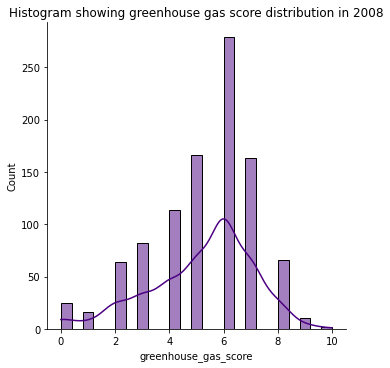

In [166]:
plt.figure(figsize = (10,3), dpi=100)
sns.displot(fuel_08['greenhouse_gas_score'], kde = True, color = 'indigo')
plt.title(f"Histogram showing greenhouse gas score distribution in 2008", color = 'Black');

<Figure size 1000x300 with 0 Axes>

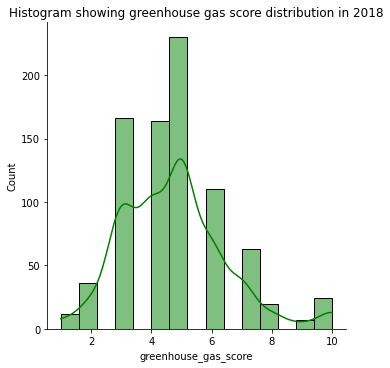

In [176]:
plt.figure(figsize = (10,3),dpi = 100)
sns.displot(fuel_18['greenhouse_gas_score'],kde=True,color = 'green')
plt.title(f"Histogram showing greenhouse gas score distribution in 2018", color = 'black');

##### From the visuals we can deduce that distribution for 2008 is more skewed to the left.

#### 2. How has the distribution of combined mpg changed from 2008 to 2018?

<Figure size 1000x300 with 0 Axes>

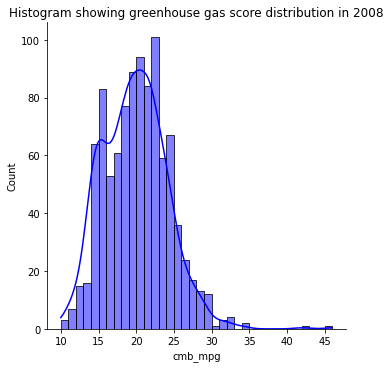

In [178]:
plt.figure(figsize = (10,3),dpi = 100)
sns.displot(fuel_08['cmb_mpg'],kde=True,color='blue')
plt.title(f"Histogram showing greenhouse gas score distribution in 2008",color='black');

<Figure size 1000x300 with 0 Axes>

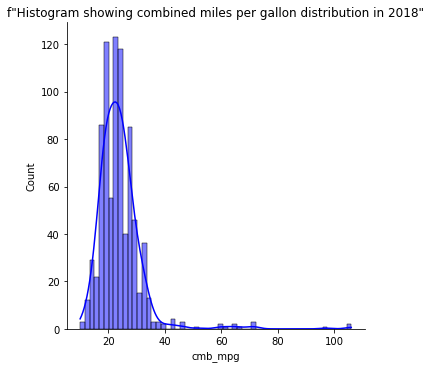

In [181]:
plt.figure(figsize=(10,3),dpi=100)
sns.displot(fuel_18['cmb_mpg'],kde=True,color='blue')
plt.title('f"Histogram showing combined miles per gallon distribution in 2018"');

##### The distribution of compined mpg became more skewed to the right from 2008 - 2018.

#### 3.  Describe the correlation between displacement and combined mpg.

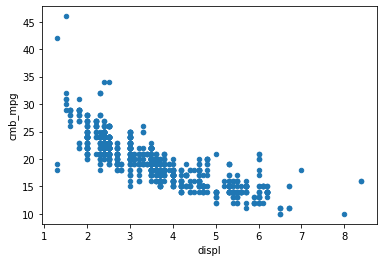

In [182]:
# The correlation between displacement and combined mpg.
fuel_08.plot(x = 'displ',y = 'cmb_mpg',kind = 'scatter');

##### The correlation between displacement and combined mpg is negative.

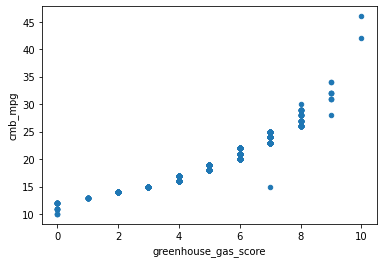

In [183]:
# The correlation between greenhouse gas score and combined mpg.

fuel_08.plot(x ='greenhouse_gas_score',y='cmb_mpg',kind = 'scatter');


##### Theres a positive correlation between greenhouse gas score and combined mpg. 

# 7. Conclusions

### Q1: Are more unique models using alternative sources of fuel? By how much?

In [184]:
# Let's look at what the sources of fuel are and which ones are alternative sources.
print('Sources of fuel and their counts in 2008 ')
print(fuel_08.fuel.value_counts())
print('Sources of fuel and their counts in 2018 ')
print(fuel_18.fuel.value_counts())


Sources of fuel and their counts in 2008 
Gasoline    984
CNG           1
ethanol       1
gas           1
Name: fuel, dtype: int64
Sources of fuel and their counts in 2018 
Gasoline       749
Ethanol         26
Gas             26
Diesel          19
Electricity     12
Name: fuel, dtype: int64


Looks like the alternative sources of fuel available in 2008 are CNG and ethanol, and those in 2018 ethanol and electricity.

In [185]:
# How many unique models used alternative sources of fuel in 2008
alt_08 = fuel_08.query('fuel in ["CNG", "ethanol"]').model.nunique()
alt_08

2

In [186]:
# How many unique models used alternative sources of fuel in 2018
alt_18 = fuel_18.query('fuel in ["Ethanol", "Electricity"]').model.nunique()
alt_18

26

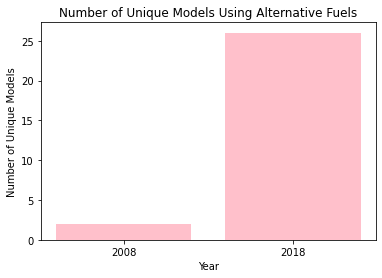

In [188]:
plt.bar(['2008','2018'],[alt_08,alt_18],color='pink')
plt.title("Number of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Number of Unique Models");

Since 2008, the number of unique models using alternative sources of fuel increased by 24.

### Q2: How much have vehicle classes improved in fuel economy? 

Let's look at the average fuel economy for each vehicle class for both years.

In [194]:
veh_08 = fuel_08.groupby('veh_class').cmb_mpg.mean()
veh_08

veh_class
SUV              18.471429
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.105105
station wagon    22.366667
van              14.952381
Name: cmb_mpg, dtype: float64

In [195]:
veh_18 = fuel_18.groupby('veh_class').cmb_mpg.mean()
veh_18

veh_class
large car          23.409091
midsize car        27.884058
minivan            20.800000
pickup             18.589744
small SUV          24.074074
small car          25.421053
special purpose    18.500000
standard SUV       18.197674
station wagon      27.529412
Name: cmb_mpg, dtype: float64

In [196]:
# How much they've increased by for each vehicle class
increment = veh_18 - veh_08
increment

veh_class
SUV                     NaN
large car          4.900000
midsize car        6.282609
minivan            1.682353
pickup             2.312635
small SUV               NaN
small car          4.315948
special purpose         NaN
standard SUV            NaN
station wagon      5.162745
van                     NaN
Name: cmb_mpg, dtype: float64

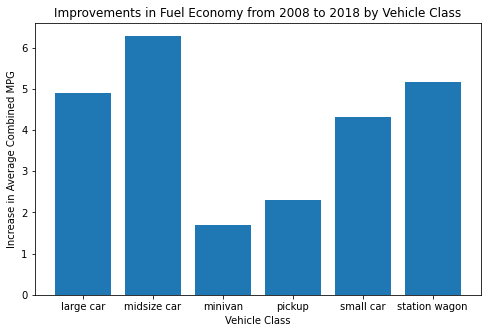

In [198]:
# Only plot the classes that exist in both years
increment.dropna(inplace=True) # Dropping those classes that did not improve
plt.subplots(figsize=(8, 5))
plt.bar(increment.index, increment)
plt.title('Improvements in Fuel Economy from 2008 to 2018 by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Increase in Average Combined MPG');

### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?

In [199]:
# Lets analyze this by filtering each dataframe by 
# SmartWay classification and exploring these datasets

# smartway labels for 2008
fuel_08.smartway.unique()

array(['no', 'yes'], dtype=object)

In [202]:
# Lets get the smart way vehicles in 2008
smart_08 = fuel_08.query('smartway == "yes"')
smart_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2.602895,4.826316,7.365789,20.984211,28.413158,23.736842,6.868421
std,0.623436,1.002025,1.148195,3.442672,3.075194,3.060379,0.827338
min,1.300000,4.000000,6.000000,17.000000,22.000000,20.000000,6.000000
25%,2.275000,4.000000,7.000000,19.000000,26.000000,22.000000,6.000000
50%,2.400000,4.000000,7.000000,20.000000,28.000000,23.000000,7.000000
75%,3.000000,6.000000,7.000000,22.000000,30.000000,25.000000,7.000000
max,5.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [203]:
# Smart labels for 2018
fuel_18.smartway.unique()

array(['No', 'Yes', 'Elite'], dtype=object)

In [204]:
# Lets get the smartway cars in 2018
smart_18 = fuel_18.query('smartway in ["Yes","Elite"]')
smart_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,1.787963,3.935185,5.212963,34.907407,41.472222,37.361111,7.925926
std,0.408031,0.416329,1.798498,16.431982,13.095236,14.848429,1.197378
min,1.200000,3.000000,3.000000,25.000000,27.000000,26.000000,7.000000
25%,1.500000,4.000000,3.000000,28.000000,36.000000,31.000000,7.000000
50%,1.700000,4.000000,5.500000,28.500000,37.000000,32.000000,7.000000
75%,2.000000,4.000000,7.000000,31.250000,40.250000,35.000000,9.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


### Q4: What features are associated with better fuel economy?

In [206]:
# Lets explore trends between cmb_mpg and the other features in this dataset
# by selecting all vehicles that have the top 50% fuel economy ratings like this.
economical_08 = fuel_08.query('cmb_mpg > cmb_mpg.mean()')
economical_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000
mean,2.667823,4.890173,6.998073,20.317919,27.603083,22.992293,6.639692
std,0.665551,1.034856,1.159565,3.198257,3.051120,2.926371,0.804935
min,1.300000,4.000000,4.000000,17.000000,20.000000,20.000000,6.000000
25%,2.300000,4.000000,6.000000,18.000000,25.000000,21.000000,6.000000
50%,2.500000,4.000000,7.000000,20.000000,27.000000,22.000000,6.000000
75%,3.000000,6.000000,7.000000,21.000000,29.000000,24.000000,7.000000
max,6.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [208]:
economical_18 = fuel_18.query('cmb_mpg > cmb_mpg.mean()')
economical_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,1.964329,4.021341,4.856707,27.472561,35.304878,30.411585,6.329268
std,0.398593,0.465477,1.860802,11.033692,9.024857,10.081539,1.410358
min,1.200000,3.000000,1.000000,21.000000,27.000000,25.000000,4.000000
25%,1.600000,4.000000,3.000000,23.000000,31.000000,26.000000,5.000000
50%,2.000000,4.000000,5.000000,25.000000,33.000000,28.000000,6.000000
75%,2.000000,4.000000,7.000000,28.000000,36.000000,31.000000,7.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


### Q5: For all of the models that were produced in 2008 that are still being produced in 2018, how much has the mpg improved and which vehicle improved the most?

In [209]:
# To answer this, lets merge datasets
# Lets label the 2008 columns so as to distinguish them from the 2018
# rename 2008 columns
fuel_08.rename(columns= lambda x : x[:10]+'_2008',inplace=True)
fuel_08.head(2)

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,cmb_mpg_2008,greenhouse_2008,smartway_2008
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no


In [210]:
# Lets merge datasets
df_combined = fuel_08.merge(fuel_18, left_on='model_2008',right_on = 'model',how='inner')

In [211]:
# Lets save the combined dataset
df_combined.to_csv('combined_dataset.csv',index=False)

In [212]:
# To do this, group by model and find the mean cmb_mpg_2008 and mean cmb_mpg for each.
model_mpg = df_combined.groupby('model').mean()[['cmb_mpg_2008', 'cmb_mpg']]

In [213]:
model_mpg.head()

,cmb_mpg_2008,cmb_mpg
model,,
ACURA RDX,19.000000,22.500000
AUDI A3,23.333333,28.000000
AUDI A4,21.000000,27.000000
AUDI A6,19.666667,25.666667
AUDI A8 L,16.500000,22.000000


In [214]:
# Lets create a new column, `mpg_change`, with the change in mpg
# Subtract the mean mpg in 2008 from that in 2018 to get the change in mpg

model_mpg['mpg_change'] = model_mpg['cmb_mpg'] - model_mpg['cmb_mpg_2008']
model_mpg.head()

,cmb_mpg_2008,cmb_mpg,mpg_change
model,,,
ACURA RDX,19.000000,22.500000,3.500000
AUDI A3,23.333333,28.000000,4.666667
AUDI A4,21.000000,27.000000,6.000000
AUDI A6,19.666667,25.666667,6.000000
AUDI A8 L,16.500000,22.000000,5.500000


In [215]:
# Lets find the vehicle that improved the most
# We'll use the max mpg change, and then use query or indexing to see what model it is!
max_change = model_mpg['mpg_change'].max()
max_change

16.53333333333334

In [216]:
# use the idxmax function to get the name
idx = model_mpg.mpg_change.idxmax()
idx

'VOLVO XC 90'

In [217]:
model_mpg.loc[idx]

cmb_mpg_2008    15.666667
cmb_mpg         32.200000
mpg_change      16.533333
Name: VOLVO XC 90, dtype: float64